In [ ]:
#@title Part 1. Data Processing

# Load the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_squared_error


data = pd.read_csv('Netflix_Userbase.csv')
print(data.head())

# Missing Values

print(data.isnull())

# Encode Categorical Variables

encodeData= pd.get_dummies(data, columns=['Subscription Type', 'Join Date','Last Payment Date','Country', 'Gender', 'Device', 'Plan Duration'])
print(encodeData)

# Feature Selection

data_dum = pd.get_dummies(data, drop_first=True)
data_dum['age'] = (data['Age']>18).astype(int)
x = data_dum.drop(['Age', 'Monthly Revenue'],axis=1)
y = data_dum['age']

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
      User ID  Subscription Type  Monthly Revenue  Join Date  \
0       False              False            False      False   
1       False              False            False      

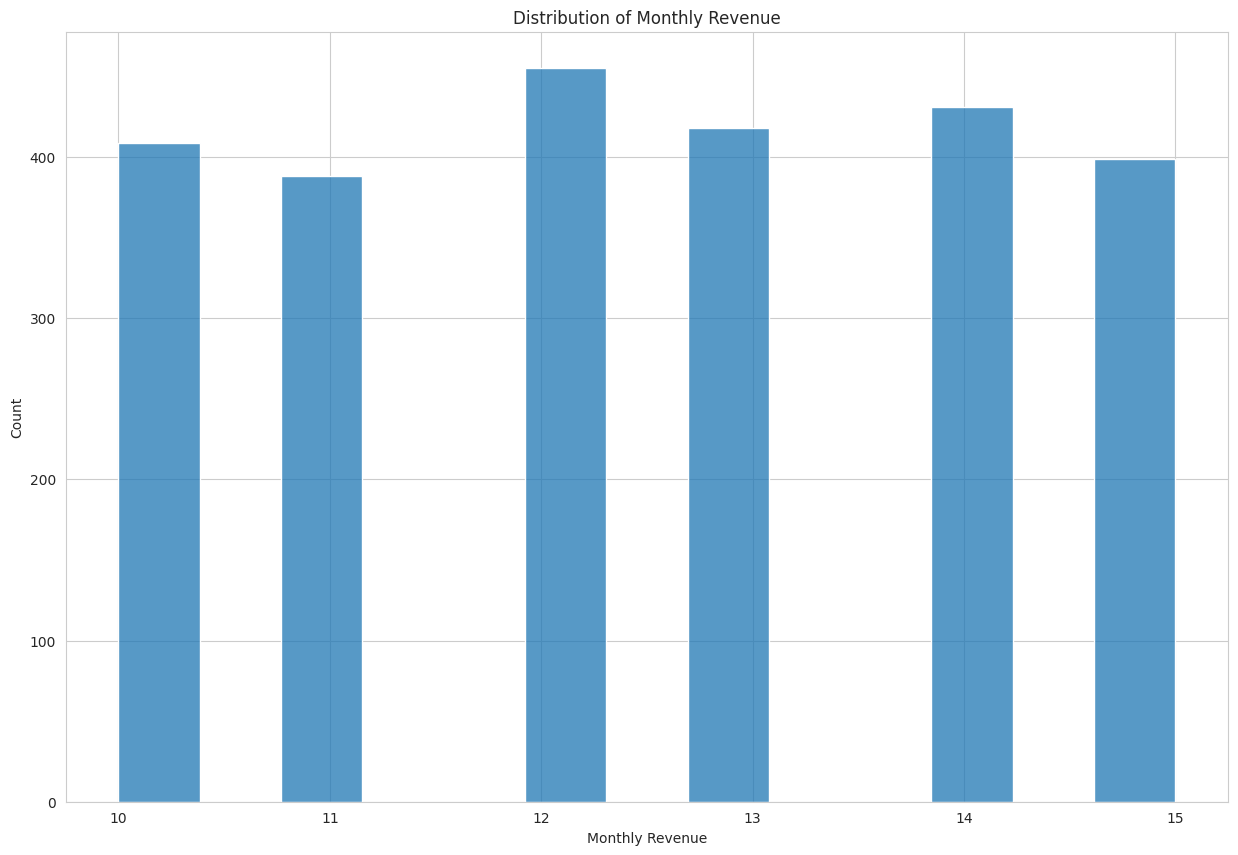

In [ ]:
#@title Part 2: Exploratory Data Analysis

# Descriptive Statistics

data.describe()

# Visualizations

plt.figure(figsize=(15, 10))
plt.title("Distribution of Monthly Revenue")
sns.histplot(x="Monthly Revenue", data=data, multiple='stack')
plt.show()

countryCounts = data['Country'].value_counts().reset_index()
countryCounts.columns = ['Country', 'User Count']

fig = px.choropleth(countryCounts, locations='Country', locationmode='country names', color='User Count', hover_name='Country', title=' User Demographics', color_continuous_scale='Plasma')
fig.show()

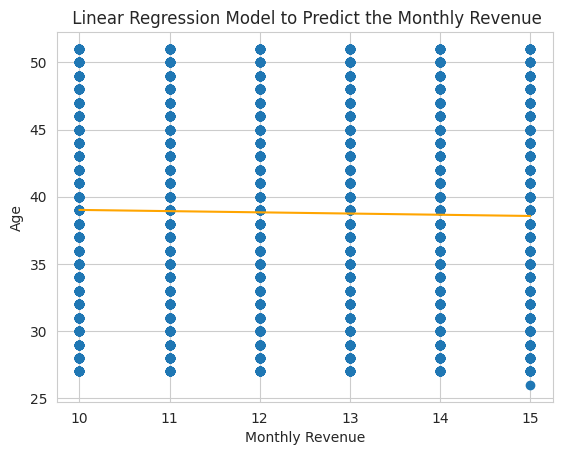

R-squared:
RMSE:


In [ ]:
#@title Part 3: Linear Regression Model

# Build the Model

x = data[['Monthly Revenue']]
y = data['Age']

model = LinearRegression()
model.fit(x,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color='orange')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title(' Linear Regression Model to Predict the Monthly Revenue')
plt.show()

# Model Evaluation

print("R-squared:")
print("RMSE:")


In [ ]:
#@title Part 4: Logistic Regression Model

# Model Building

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Model Evaluation

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
confMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)

print(f"accuracy:{accuracy}")
print("Confusion Matrix: ")
print(confMatrix)
print("Classification Report: ")
print(classReport)

accuracy:0.0
Confusion Matrix: 
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:134

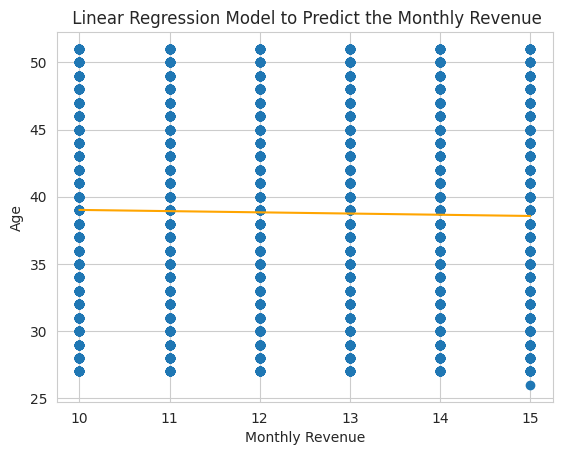

In [ ]:
#@title Part 5: Comparative Analysis and Visualization

# Feature Importance for Linear Regression
x = data[['Monthly Revenue']]
y = data['Age']

model = LinearRegression()
model.fit(x,y)


plt.scatter(x,y)
plt.plot(x,model.predict(x),color='orange')
plt.xlabel('Monthly Revenue')
plt.ylabel('Age')
plt.title(' Linear Regression Model to Predict the Monthly Revenue')
plt.show()
# Feature Importance for Logistic Regression

# Visualization of Feature Importance
